# TODO: change this to test/test_reweighted_acc

In [1]:
# Waterbirds  (Group shift with spurious correlation)
# CelebA  (Group shift with spurious correlation)

# CivilComments from WILDS  (Group shift without(?) spurious correlation)
# MNLI  (Group shift without spurious correlations, has transfer)

# Imbalanced CIFAR10 (exp, 100:1)  (Label shift)

# Bar plot of val/val_reweighted_acc 


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import sys
sys.path.append("../../")
from src.utils.wandb_utils import get_config, get_history, config_to_omegaconf


user = "kealexanderwang"
project = "importance-reweighing"

In [4]:
def get_name_from_target(_target_: str, prefix: str = None, suffix: str = None):
    # Input example: 'src.pl_datamodules.waterbirds_datamodule.UndersampledWaterbirdsDataModule'
    # Expected output: 'UndersapmledWaterbirds'
    name = _target_.split('.')[-1]
    
    if (prefix is not None) and name.startswith(prefix):
        name = name[len(prefix):]
    else:
        raise RuntimeError(f"{name} does not start with {prefix}")
    
    if (suffix is not None) and name.endswith(suffix):
        name = name[:-len(suffix)]
    else:
        raise RuntimeError(f"{name} does not end with {suffix}")
    return name

In [5]:
#column_names = ["Dataset", "Method", "Best reweighted val acc"]
column_names = ["Dataset", "Method", "Final reweighted val acc", "Worst group acc"]

# Parse Waterbirds

In [49]:
run_names = [
 "waterbirds-undersampled-493",
 "waterbirds-erm-733",
 "waterbirds-resampled-733",
 "waterbirds-reweighted-732",

]

query = {"displayName": {"$in": run_names}}

In [50]:
run__df_list = get_history(user=user, project=project, query=query)

In [51]:
dataset_name = "Waterbirds"

metric_names = ["val/val_reweighted_acc", "val/worst_group_acc"]
argmax_metric = "val/val_reweighted_acc"


rows = []
    

for run, df in run__df_list:
    run_name = run.name
    
    #config = run.config
    #config = config_to_omegaconf(config)
    metrics = df.loc[:, metric_names]
    
    #max_metric = metric.dropna().max()  # dropna in case we don't log every step
    #arg_max = metrics.dropna().idxmax()[argmax_metric]
    max_metrics = metrics.dropna().iloc[-1]
    
    if "undersampled" in run_name:
        method_name = "Undersampled"
    elif "resampled" in run_name:
        method_name = "Resampled"
    elif "reweighted" in run_name:
        method_name = "Reweighted"
    elif "erm" in run_name:
        method_name = "ERM"
    else:
        raise RuntimeError(f"{run_name} is not one of the expected methods")
    
    row = [dataset_name, method_name] + max_metrics.tolist()
    rows.append(row)

In [52]:
waterbirds_df = pd.DataFrame(rows, columns=column_names)
waterbirds_df

,Dataset,Method,Final reweighted val acc,Worst group acc
0,Waterbirds,ERM,0.835452,0.601504
1,Waterbirds,Resampled,0.898008,0.804511
2,Waterbirds,Reweighted,0.878130,0.714286
3,Waterbirds,Undersampled,0.887594,0.851931


# Parse CelebA confounder

In [53]:
run_names = [
    "celeba-resampled-696",
    "celeba-undersampled-513",
    "celeba-reweighted-507",
    "celeba-erm-506",
]

query = {"displayName": {"$in": run_names}}

In [54]:
run__df_list = get_history(user=user, project=project, query=query)

In [55]:
dataset_name = "CelebA"

metric_names = ["val/val_reweighted_acc", "val/worst_group_acc"]
argmax_metric = "val/val_reweighted_acc"


rows = []
    

for run, df in run__df_list:
    run_name = run.name
    
    #config = run.config
    #config = config_to_omegaconf(config)
    metrics = df.loc[:, metric_names]
    
    
    #max_metric = metric.dropna().max()  # dropna in case we don't log every step
    #arg_max = metrics.dropna().idxmax()[argmax_metric]
    #max_metrics = metrics.loc[arg_max]
    max_metrics = metrics.dropna().iloc[-1]
    
    if "undersampled" in run_name:
        method_name = "Undersampled"
    elif "resampled" in run_name:
        method_name = "Resampled"
    elif "reweighted" in run_name:
        method_name = "Reweighted"
    elif "erm" in run_name:
        method_name = "ERM"
    else:
        raise RuntimeError(f"{run_name} is not one of the expected methods")
    
    row = [dataset_name, method_name] + max_metrics.tolist()
    rows.append(row)

In [56]:
celeba_df = pd.DataFrame(rows, columns=column_names)
celeba_df

,Dataset,Method,Final reweighted val acc,Worst group acc
0,CelebA,Resampled,0.835845,0.543956
1,CelebA,Undersampled,0.912611,0.891857
2,CelebA,Reweighted,0.809135,0.456044
3,CelebA,ERM,0.808215,0.439560


# Parse CivilComments

In [57]:
run_names = [
    "civilcomments-undersampled-546",
    "civilcomments-resampled-545",
    "civilcomments-reweighted-544",
    "civilcomments-erm-539",
]

query = {"displayName": {"$in": run_names}}

In [58]:
run__df_list = get_history(user=user, project=project, query=query)

In [59]:
dataset_name = "CivilComments"


metric_names = ["val/val_reweighted_acc", "val/worst_group_acc"]
argmax_metric = "val/val_reweighted_acc"


rows = []
    

for run, df in run__df_list:
    run_name = run.name
    
    #config = run.config
    #config = config_to_omegaconf(config)
    metrics = df.loc[:, metric_names]
    
    #max_metric = metric.dropna().max()  # dropna in case we don't log every step
    #arg_max = metrics.dropna().idxmax()[argmax_metric]
    #max_metrics = metrics.loc[arg_max]
    max_metrics = metrics.dropna().iloc[-1]
    
    if "undersampled" in run_name:
        method_name = "Undersampled"
    elif "resampled" in run_name:
        method_name = "Resampled"
    elif "reweighted" in run_name:
        method_name = "Reweighted"
    elif "erm" in run_name:
        method_name = "ERM"
    else:
        raise RuntimeError(f"{run_name} is not one of the expected methods")
    
    row = [dataset_name, method_name] + max_metrics.tolist()
    rows.append(row)

In [60]:
civilcomments_df = pd.DataFrame(rows, columns=column_names)
civilcomments_df

,Dataset,Method,Final reweighted val acc,Worst group acc
0,CivilComments,Undersampled,0.797383,0.679178
1,CivilComments,Resampled,0.798683,0.677298
2,CivilComments,Reweighted,0.780134,0.652908
3,CivilComments,ERM,0.764718,0.614109


# Parse MNLIN uneven

In [61]:
run_names = [
    "mnli-uneven-reweighted-695",
    "mnli-uneven-resampled-694",
    "mnli-uneven-undersampled-683",
    "mnli-uneven-erm-682",
]

query = {"displayName": {"$in": run_names}}

In [62]:
run__df_list = get_history(user=user, project=project, query=query)

In [63]:
dataset_name = "MNLI (uneven)"


metric_names = ["val/val_reweighted_acc", "val/worst_group_acc"]
argmax_metric = "val/val_reweighted_acc"


rows = []
    

for run, df in run__df_list:
    run_name = run.name
    
    #config = run.config
    #config = config_to_omegaconf(config)
    metrics = df.loc[:, metric_names]
    
    #max_metric = metric.dropna().max()  # dropna in case we don't log every step
    #arg_max = metrics.dropna().idxmax()[argmax_metric]
    #max_metrics = metrics.loc[arg_max]
    max_metrics = metrics.dropna().iloc[-1]
    
    if "undersampled" in run_name:
        method_name = "Undersampled"
    elif "resampled" in run_name:
        method_name = "Resampled"
    elif "reweighted" in run_name:
        method_name = "Reweighted"
    elif "erm" in run_name:
        method_name = "ERM"
    else:
        raise RuntimeError(f"{run_name} is not one of the expected methods")
    
    row = [dataset_name, method_name] + max_metrics.tolist()
    rows.append(row)

In [64]:
mnli_df = pd.DataFrame(rows, columns=column_names)
mnli_df

,Dataset,Method,Final reweighted val acc,Worst group acc
0,MNLI (uneven),Reweighted,0.694105,0.636317
1,MNLI (uneven),Resampled,0.672231,0.619437
2,MNLI (uneven),Undersampled,0.640240,0.585166
3,MNLI (uneven),ERM,0.699510,0.649616


# Parse Imbalanced CIFAR10

In [65]:
run_names = [
    "cifar10-exp100-undersampled-700",
    "cifar10-exp100-erm-700",
    "cifar10-exp100-reweighted-702",
    "cifar10-exp100-resampled-699",
    "cifar10-exp10-reweighted-723",
    "cifar10-exp10-resampled-722",
    "cifar10-exp10-undersampled-721",
    "cifar10-exp10-erm-720",
    "cifar10-step100-reweighted-719",
    "cifar10-step100-resampled-718",
    "cifar10-step100-undersampled717",
    "cifar10-step100-erm-715",
    "cifar10-step10-reweighted-716",
    "cifar10-step10-resampled-714",
    "cifar10-step10-undersampled-713",
    "cifar10-step10-erm-712",
]

query = {"displayName": {"$in": run_names}}

In [66]:
run__df_list = get_history(user=user, project=project, query=query)

In [67]:
metric_names = ["val/val_reweighted_acc", "val/worst_group_acc"]
argmax_metric = "val/val_reweighted_acc"


rows = []
    

for run, df in run__df_list:
    run_name = run.name
    
    #config = run.config
    #config = config_to_omegaconf(config)
    metrics = df.loc[:, metric_names]
    
    #max_metric = metric.dropna().max()  # dropna in case we don't log every step
    #arg_max = metrics.dropna().idxmax()[argmax_metric]
    #max_metrics = metrics.loc[arg_max]
    max_metrics = metrics.dropna().iloc[-1]
    
    if "undersampled" in run_name:
        method_name = "Undersampled"
    elif "resampled" in run_name:
        method_name = "Resampled"
    elif "reweighted" in run_name:
        method_name = "Reweighted"
    elif "erm" in run_name:
        method_name = "ERM"
    else:
        raise RuntimeError(f"{run_name} is not one of the expected methods")
        
    if "-exp10-" in run_name:
        dataset_name = "CIFAR10 (long tail, 10:1)"
    elif "-exp100-" in run_name:
        dataset_name = "CIFAR10 (long tail, 100:1)"
    elif "-step10-" in run_name:
        dataset_name = "CIFAR10 (step, 10:1)"
    elif "-step100-" in run_name:
        dataset_name = "CIFAR10 (step, 100:1)"
    else:
        raise RuntimeError(f"{run_name} is not an Imbalanced CIFAR dataset!")
    
    
    row = [dataset_name, method_name] + max_metrics.tolist()
    rows.append(row)

In [68]:
cifar10_df = pd.DataFrame(rows, columns=column_names)
cifar10_df

,Dataset,Method,Final reweighted val acc,Worst group acc
0,"CIFAR10 (long tail, 10:1)",Reweighted,0.6458,0.479
1,"CIFAR10 (long tail, 10:1)",Resampled,0.5829,0.385
2,"CIFAR10 (long tail, 10:1)",Undersampled,0.5323,0.382
3,"CIFAR10 (long tail, 10:1)",ERM,0.6273,0.488
4,"CIFAR10 (step, 100:1)",Reweighted,0.3938,0.002
5,"CIFAR10 (step, 100:1)",Resampled,0.3649,0.002
6,"CIFAR10 (step, 100:1)",Undersampled,0.3354,0.128
7,"CIFAR10 (step, 10:1)",Reweighted,0.5880,0.193
8,"CIFAR10 (step, 100:1)",ERM,0.4044,0.008
9,"CIFAR10 (step, 10:1)",Resampled,0.5173,0.157


# Sort out color palette

In [69]:
all_df = pd.concat([
    waterbirds_df,
    celeba_df,
    civilcomments_df,
    mnli_df,
    cifar10_df,
])

unique = all_df["Method"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

# Plot group shift

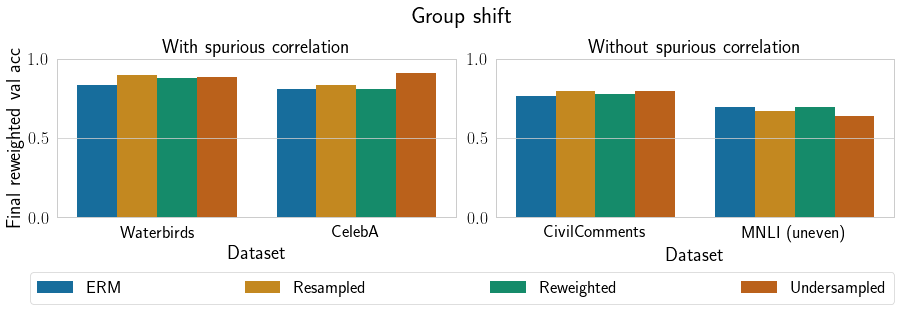

In [70]:
rc = {"lines.linewidth": 3}  # Overwrite seaborn context for linewidth
font_scale = 2.  # Scale up the seaborn context font settings

gs_sc_df = pd.concat([waterbirds_df, celeba_df])  # group shift no spurious correlation
gs_no_sc_df = pd.concat([civilcomments_df, mnli_df])

gs_sc_df = gs_sc_df.sort_values(by="Method")
gs_no_sc_df = gs_no_sc_df.sort_values(by="Method")

x = "Dataset"
y = "Final reweighted val acc"
hue = "Method"

with sns.plotting_context("paper", font_scale=font_scale, rc=rc):
    ncols = 2
    height = 4
    width = (ncols + 1.75) * height
    fig, axes = plt.subplots(ncols=ncols, figsize=(width, height))
    
    ax = axes[0]
    sns.barplot(data=gs_sc_df.loc[:, [x, y, hue]],
                x=x,
                y=y,
                hue=hue,
                ax=ax,
                palette=palette,
    )
    ax.set(title="With spurious correlation")
    ax.set(ylabel="Final reweighted val acc")
    ax.legend().remove()
    ax.set(ylim=(0., 1.0))
    
    ax = axes[1]
    sns.barplot(data=gs_no_sc_df.loc[:, [x, y, hue]],
                x=x,
                y=y,
                hue=hue,
                ax=ax,
                palette=palette,
    )
    ax.set(title="Without spurious correlation")
    ax.legend().remove()
    ax.set(ylabel=None)
    ax.set(ylim=(0., 1.0))
    
    
    handles, labels = ax.get_legend_handles_labels()
    fig.subplots_adjust(bottom=0.25, top=0.8, wspace=0.1)
    lg = fig.legend(handles=handles, labels=labels,
               bbox_to_anchor=(0.1, -0.05, 0.8, 0.),  # (left, bottom, right, top)
               loc="lower center",
               ncol=len(labels),
               borderaxespad=0.,
               mode="expand",
    )
    
    st = fig.suptitle("Group shift")

In [71]:
fig.savefig("group-shift-rw-val-acc-at-convergence.pdf", bbox_inches="tight")

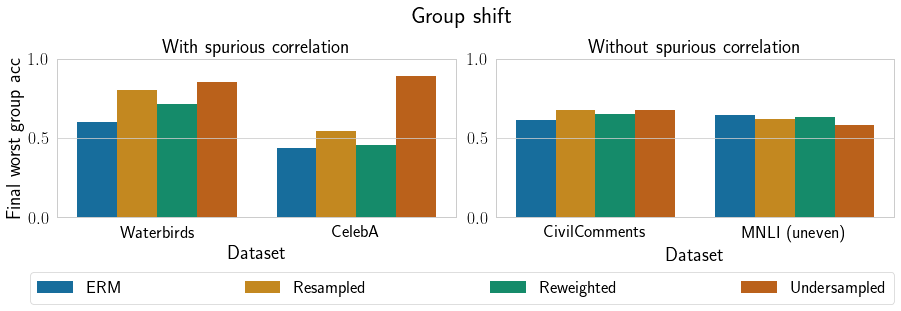

In [72]:
rc = {"lines.linewidth": 3}  # Overwrite seaborn context for linewidth
font_scale = 2.  # Scale up the seaborn context font settings

gs_sc_df = pd.concat([waterbirds_df, celeba_df])  # group shift no spurious correlation
gs_no_sc_df = pd.concat([civilcomments_df, mnli_df])

gs_sc_df = gs_sc_df.sort_values(by="Method")
gs_no_sc_df = gs_no_sc_df.sort_values(by="Method")

x = "Dataset"
y = "Worst group acc"
hue = "Method"

with sns.plotting_context("paper", font_scale=font_scale, rc=rc):
    ncols = 2
    height = 4
    width = (ncols + 1.75) * height
    fig, axes = plt.subplots(ncols=ncols, figsize=(width, height))
    
    ax = axes[0]
    sns.barplot(data=gs_sc_df.loc[:, [x, y, hue]],
                x=x,
                y=y,
                hue=hue,
                ax=ax,
                palette=palette,
    )
    ax.set(title="With spurious correlation")
    ax.set(ylabel="Final worst group acc")
    ax.legend().remove()
    ax.set(ylim=(0., 1.0))
    
    ax = axes[1]
    sns.barplot(data=gs_no_sc_df.loc[:, [x, y, hue]],
                x=x,
                y=y,
                hue=hue,
                ax=ax,
                palette=palette,
    )
    ax.set(title="Without spurious correlation")
    ax.legend().remove()
    ax.set(ylabel=None)
    ax.set(ylim=(0., 1.0))
    
    
    handles, labels = ax.get_legend_handles_labels()
    fig.subplots_adjust(bottom=0.25, top=0.8, wspace=0.1)
    lg = fig.legend(handles=handles, labels=labels,
               bbox_to_anchor=(0.1, -0.05, 0.8, 0.),  # (left, bottom, right, top)
               loc="lower center",
               ncol=len(labels),
               borderaxespad=0.,
               mode="expand",
    )
    
    st = fig.suptitle("Group shift")

In [73]:
fig.savefig("group-shift-wg-val-acc-at-convergence.pdf", bbox_inches="tight")

# Label shift

In [74]:
cifar10_exp = cifar10_df[cifar10_df["Dataset"].str.contains("long tail")].sort_values(by=["Method", "Dataset"])
cifar10_exp

,Dataset,Method,Final reweighted val acc,Worst group acc
13,"CIFAR10 (long tail, 100:1)",ERM,0.4185,0.018
3,"CIFAR10 (long tail, 10:1)",ERM,0.6273,0.488
15,"CIFAR10 (long tail, 100:1)",Resampled,0.3916,0.009
1,"CIFAR10 (long tail, 10:1)",Resampled,0.5829,0.385
12,"CIFAR10 (long tail, 100:1)",Reweighted,0.4078,0.016
0,"CIFAR10 (long tail, 10:1)",Reweighted,0.6458,0.479
14,"CIFAR10 (long tail, 100:1)",Undersampled,0.3659,0.234
2,"CIFAR10 (long tail, 10:1)",Undersampled,0.5323,0.382


In [75]:
cifar10_step = cifar10_df[cifar10_df["Dataset"].str.contains("step")].sort_values(by=["Method", "Dataset"])
cifar10_step

,Dataset,Method,Final reweighted val acc,Worst group acc
8,"CIFAR10 (step, 100:1)",ERM,0.4044,0.008
11,"CIFAR10 (step, 10:1)",ERM,0.5744,0.152
5,"CIFAR10 (step, 100:1)",Resampled,0.3649,0.002
9,"CIFAR10 (step, 10:1)",Resampled,0.5173,0.157
4,"CIFAR10 (step, 100:1)",Reweighted,0.3938,0.002
7,"CIFAR10 (step, 10:1)",Reweighted,0.5880,0.193
6,"CIFAR10 (step, 100:1)",Undersampled,0.3354,0.128
10,"CIFAR10 (step, 10:1)",Undersampled,0.5243,0.305


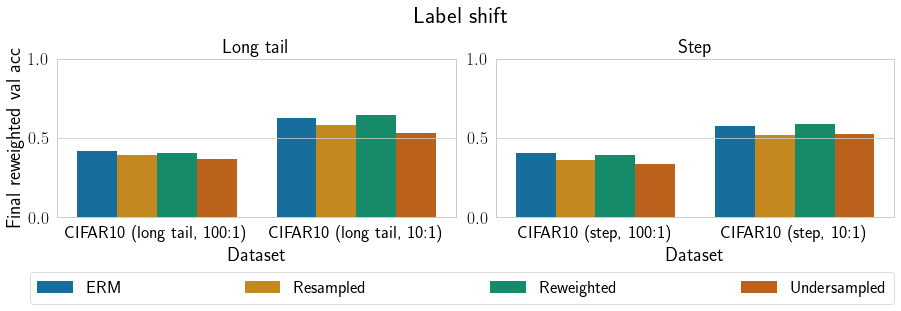

In [76]:
x = "Dataset"
y = "Final reweighted val acc"
hue = "Method"


rc = {"lines.linewidth": 3}  # Overwrite seaborn context for linewidth
font_scale = 2.  # Scale up the seaborn context font settings

with sns.plotting_context("paper", font_scale=font_scale, rc=rc):
    ncols = 2
    height = 4
    width = (ncols + 1.75) * height
    fig, axes = plt.subplots(ncols=ncols, figsize=(width, height))
    
    ax = axes[0]
    sns.barplot(data=cifar10_exp.loc[:, [x, y, hue]],
                x=x,
                y=y,
                hue=hue,
                ax=ax,
                palette=palette,
    )
    ax.set(title="Long tail")
    ax.set(ylabel="Final reweighted val acc")
    ax.legend().remove()
    ax.set(ylim=(0, 1.0))
    
    ax = axes[1]
    sns.barplot(data=cifar10_step.loc[:, [x, y, hue]],
                x=x,
                y=y,
                hue=hue,
                ax=ax,
                palette=palette,
    )
    ax.set(title="Step")
    ax.legend().remove()
    ax.set(ylim=(0, 1.0))
    ax.set(ylabel=None)
    
    
    handles, labels = ax.get_legend_handles_labels()
    fig.subplots_adjust(bottom=0.25, top=0.8, wspace=0.1)
    lg = fig.legend(handles=handles, labels=labels,
               bbox_to_anchor=(0.1, -0.05, 0.8, 0.),  # (left, bottom, right, top)
               loc="lower center",
               ncol=len(labels),
               borderaxespad=0.,
               mode="expand",
    )
    st = fig.suptitle("Label shift")

In [77]:
fig.savefig("label-shift-rw-val-acc-at-convergence.pdf", bbox_inches="tight")

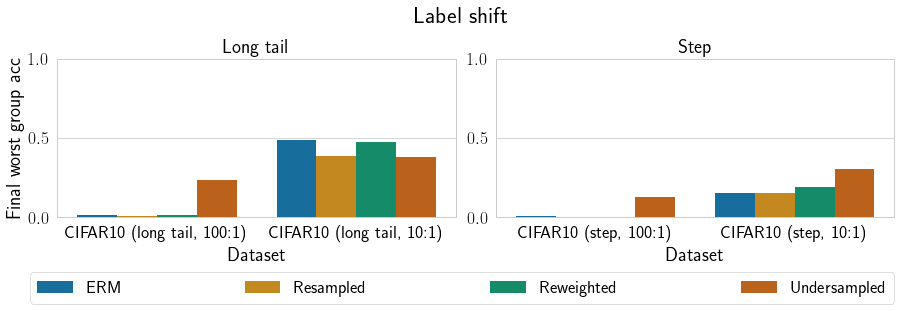

In [78]:
x = "Dataset"
y = "Worst group acc"
hue = "Method"


rc = {"lines.linewidth": 3}  # Overwrite seaborn context for linewidth
font_scale = 2.  # Scale up the seaborn context font settings

with sns.plotting_context("paper", font_scale=font_scale, rc=rc):
    ncols = 2
    height = 4
    width = (ncols + 1.75) * height
    fig, axes = plt.subplots(ncols=ncols, figsize=(width, height))
    
    ax = axes[0]
    sns.barplot(data=cifar10_exp.loc[:, [x, y, hue]],
                x=x,
                y=y,
                hue=hue,
                ax=ax,
                palette=palette,
    )
    ax.set(title="Long tail")
    ax.set(ylabel="Final worst group acc")
    ax.legend().remove()
    ax.set(ylim=(0, 1.0))
    
    ax = axes[1]
    sns.barplot(data=cifar10_step.loc[:, [x, y, hue]],
                x=x,
                y=y,
                hue=hue,
                ax=ax,
                palette=palette,
    )
    ax.set(title="Step")
    ax.legend().remove()
    ax.set(ylim=(0, 1.0))
    ax.set(ylabel=None)
    
    
    handles, labels = ax.get_legend_handles_labels()
    fig.subplots_adjust(bottom=0.25, top=0.8, wspace=0.1)
    lg = fig.legend(handles=handles, labels=labels,
               bbox_to_anchor=(0.1, -0.05, 0.8, 0.),  # (left, bottom, right, top)
               loc="lower center",
               ncol=len(labels),
               borderaxespad=0.,
               mode="expand",
    )
    st = fig.suptitle("Label shift")

In [79]:
fig.savefig("label-shift-wg-val-acc-at-convergence.pdf", bbox_inches="tight")